In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
bio = pd.read_csv("/content/merged_aadhar_biometric_data.csv")
demo = pd.read_csv("/content/merged_aadhar_demographic_data.csv")
enroll = pd.read_csv("/content/merged_aadhar_enrolment_data.csv")

In [ ]:
datasets = [bio, demo, enroll]

for df in datasets:
    df.columns = df.columns.str.strip().str.lower()
    df["district"] = df["district"].str.title()
    df["state"] = df["state"].str.title()

In [ ]:
enroll_dist = enroll.groupby(["state", "district"], as_index=False)[
    ["age_0_5", "age_5_17", "age_18_greater"]
].sum()

enroll_dist["total_population"] = (
    enroll_dist["age_0_5"] +
    enroll_dist["age_5_17"] +
    enroll_dist["age_18_greater"]
)

enroll_dist["adult_population_ratio"] = (
    enroll_dist["age_18_greater"] / enroll_dist["total_population"]
)

In [ ]:
bio_dist = bio.groupby(["state", "district"], as_index=False)[
    ["bio_age_5_17", "bio_age_17_"]
].sum()

bio_dist["total_biometric"] = (
    bio_dist["bio_age_5_17"] + bio_dist["bio_age_17_"]
)


In [ ]:
display(bio_dist[(bio_dist['state'] == 'Haryana') & (bio_dist['district'] == 'Gurugram')])

,state,district,bio_age_5_17,bio_age_17_,total_biometric


In [ ]:
demo_dist = demo.groupby(["state", "district"], as_index=False)[
    ["demo_age_5_17", "demo_age_17_"]
].sum()

demo_dist["total_demographic_updates"] = (
    demo_dist["demo_age_5_17"] + demo_dist["demo_age_17_"]
)


In [ ]:
df = enroll_dist.merge(bio_dist, on=["state", "district"], how="inner")
df = df.merge(demo_dist, on=["state", "district"], how="inner")
df.fillna(0, inplace=True)


In [ ]:
df["biometric_coverage_index"] = (
    df["total_biometric"] / df["total_population"]
)

df["demographic_activity_score"] = (
    df["total_demographic_updates"] / df["total_population"]
)


In [ ]:
df = df[~((df['state'] == '100000') & (df['district'] == '100000'))]
display(df.head())

,state,district,age_0_5,age_5_17,age_18_greater,total_population,adult_population_ratio,bio_age_5_17,bio_age_17_,total_biometric,demo_age_5_17,demo_age_17_,total_demographic_updates,biometric_coverage_index,demographic_activity_score
0,Andaman & Nicobar Islands,Andamans,70,5,0,75,0.0,343,1672,2015,7,743,750,26.866667,10.000000
1,Andaman & Nicobar Islands,Nicobars,1,0,0,1,0.0,1,1,2,0,4,4,2.000000,4.000000
2,Andaman & Nicobar Islands,South Andaman,38,0,0,38,0.0,61,306,367,6,299,305,9.657895,8.026316
3,Andaman And Nicobar Islands,Nicobar,64,11,0,75,0.0,992,819,1811,58,729,787,24.146667,10.493333
4,Andaman And Nicobar Islands,North And Middle Andaman,128,4,0,132,0.0,3780,2603,6383,112,1897,2009,48.356061,15.219697


In [ ]:
print("Top 10 districts by adult population ratio:")
display(df.sort_values("adult_population_ratio", ascending=False)
        [["state", "district", "adult_population_ratio"]]
        .head(10))

print("\nBottom 10 districts by biometric coverage:")
display(df.sort_values("biometric_coverage_index", ascending=True)
        [["state", "district", "biometric_coverage_index"]]
        .head(10))


print("\n top 10 districts by biometric coverage:")
display(df.sort_values("biometric_coverage_index", ascending=False)
        [["state", "district", "biometric_coverage_index"]]
        .head(10))

Top 10 districts by adult population ratio:


,state,district,adult_population_ratio
568,Meghalaya,Eastern West Khasi Hills,0.720049
581,Mizoram,Khawzawl,0.666667
759,Sikkim,Namchi,0.583333
588,Mizoram,Saitual,0.583333
571,Meghalaya,Ri Bhoi,0.362269
566,Meghalaya,East Jaintia Hills,0.349893
567,Meghalaya,East Khasi Hills,0.345273
577,Meghalaya,West Khasi Hills,0.334004
59,Arunachal Pradesh,Leparada,0.333333
572,Meghalaya,South Garo Hills,0.325602



Bottom 10 districts by biometric coverage:


,state,district,biometric_coverage_index
379,Karnataka,Bengaluru Rural,0.003584
568,Meghalaya,Eastern West Khasi Hills,0.009780
141,Bihar,Pashchim Champaran,0.021578
776,Tamil Nadu,Kanchipuram,0.023256
740,Rajasthan,Jalore,0.040486
230,Gujarat,Banas Kantha,0.040525
88,Assam,Dima Hasao,0.100000
560,Manipur,Pherzawl,0.181818
759,Sikkim,Namchi,0.208333
581,Mizoram,Khawzawl,0.222222



 top 10 districts by biometric coverage:


,state,district,biometric_coverage_index
830,Telangana,Medchal?Malkajgiri,428.000000
205,Daman & Diu,Daman,156.888889
589,Mizoram,Serchhip,74.549020
207,Daman And Diu,Daman,69.534483
549,Maharashtra,Wardha,64.751152
206,Daman & Diu,Diu,64.416667
585,Mizoram,Mamit,62.660819
517,Maharashtra,Gadchiroli,59.252317
508,Maharashtra,Bhandara,53.706779
543,Maharashtra,Ratnagiri,53.472532


In [ ]:
state_summary = df.groupby('state')[['total_population', 'total_demographic_updates']].sum().reset_index()
display(state_summary)

,state,total_population,total_demographic_updates
0,Andaman & Nicobar Islands,114,1059
1,Andaman And Nicobar Islands,397,6187
2,Andhra Pradesh,125277,2295582
3,Arunachal Pradesh,4344,36443
4,Assam,229775,1012578
5,Bihar,594714,4814350
6,Chandigarh,2723,83356
7,Chhattisgarh,102236,2005434
8,Dadra & Nagar Haveli,25,235
9,Dadra And Nagar Haveli,744,6033


In [ ]:
net_population = state_summary['total_population'].sum()
print(f"Net Population in the country: {net_population}")

Net Population in the country: 5347455


In [ ]:
total_demographic_updates_country = df['total_demographic_updates'].sum()
total_biometric_country = df['total_biometric'].sum()

print(f"Total Demographic Updates in the country: {total_demographic_updates_country}")
print(f"Total Biometric Updates in the country: {total_biometric_country}")

Total Demographic Updates in the country: 49293230
Total Biometric Updates in the country: 69762690


### Inverse Relationship (Negative Correlation)
There appears to be a general inverse relationship between the two variables:

In many public health initiatives, biometric systems (like fingerprinting or iris scans) are first implemented for infant and child vaccination tracking.

The Insight: If a district has a high "Adult Population Ratio" but low biometric coverage, it likely means the biometric program is strictly limited to newborns and children. The adults in that district are part of the "denominator" (the population) but are not being "captured" by the system.

Policy-makers can see that the adults are there (via census or demographic data), but they cannot "see" them in the biometric database. This makes it difficult to run targeted adult health campaigns (like for Hep B, HPV, or COVID-19 boosters) because there is no unique digital identifier to track who has been reached.

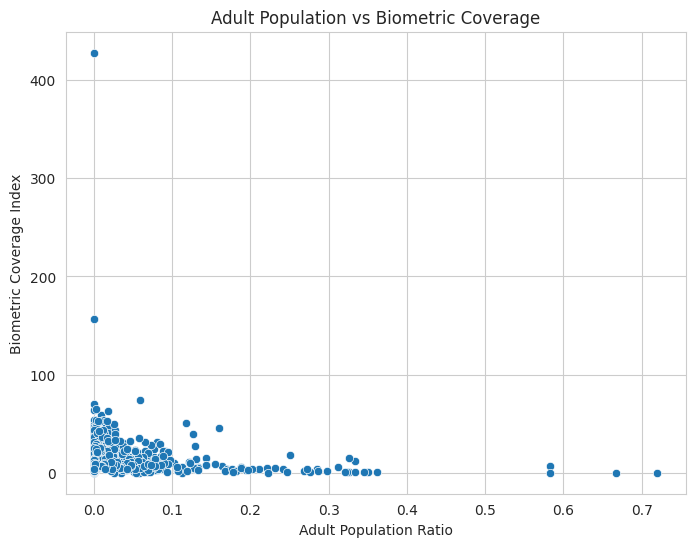

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="adult_population_ratio",
    y="biometric_coverage_index"
)
plt.title("Adult Population vs Biometric Coverage")
plt.xlabel("Adult Population Ratio")
plt.ylabel("Biometric Coverage Index")
plt.show()


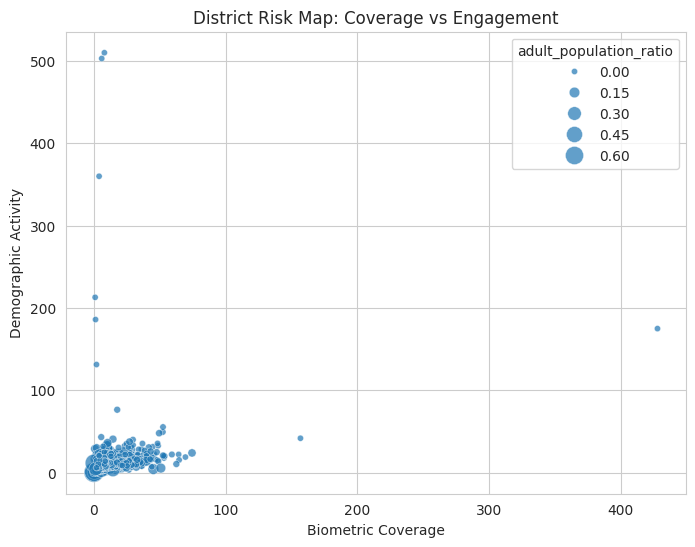

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="biometric_coverage_index",
    y="demographic_activity_score",
    size="adult_population_ratio",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("District Risk Map: Coverage vs Engagement")
plt.xlabel("Biometric Coverage")
plt.ylabel("Demographic Activity")
plt.show()


In [ ]:
num_districts = df[['state', 'district']].drop_duplicates().shape[0]
print(f"Total number of unique districts: {num_districts}")

Total number of unique districts: 1008


In [ ]:
enrollment_df = pd.read_excel('/content/cleaned_aadhar_enrollment_data.xlsx')
biometric_df = pd.read_csv('/content/merged_aadhar_biometric_data.csv')
demographic_df = pd.read_csv('/content/merged_aadhar_demographic_data.csv')

In [ ]:
state_name_mapping = {
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli',
    'Daman & Diu': 'Daman And Diu',
    'Jammu & Kashmir': 'Jammu And Kashmir',
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal'
}

In [ ]:
enrollment_df.drop('date', axis=1, inplace=True)
enrollment_df.drop('pincode', axis=1, inplace=True)
aggregated_enrollment_df = enrollment_df.groupby(['state', 'district']).sum().reset_index()

# Ensure the sum results are integer types for age columns
aggregated_enrollment_df['age_0_5'] = aggregated_enrollment_df['age_0_5'].astype(int)
aggregated_enrollment_df['age_5_17'] = aggregated_enrollment_df['age_5_17'].astype(int)
aggregated_enrollment_df['age_18_greater'] = aggregated_enrollment_df['age_18_greater'].astype(int)

aggregated_enrollment_df.to_csv('/content/merged_aadhar_enrollment_data_new.csv', index=False)


print("Enrollment data aggregated, cleaned, and saved successfully.")
print("Displaying the first 5 rows of the aggregated data:")
print(aggregated_enrollment_df.head())

In [ ]:
biometric_df.drop('date', axis=1, inplace=True)
biometric_df.drop('pincode', axis=1, inplace=True)
aggregated_biometric_df = biometric_df.groupby(['state', 'district']).sum().reset_index()

# Ensure the sum results are integer types for age columns
aggregated_biometric_df['bio_age_5_17'] = aggregated_biometric_df['bio_age_5_17'].astype(int)
aggregated_biometric_df['bio_age_17_'] = aggregated_biometric_df['bio_age_17_'].astype(int)

aggregated_biometric_df.to_csv('/content/merged_aadhar_biometric_data.csv', index=False)

print("Biometric data aggregated, cleaned, and saved successfully.")
print("Displaying the first 5 rows of the aggregated data:")
print(aggregated_biometric_df.head())

Biometric data aggregated, cleaned, and saved successfully.
Displaying the first 5 rows of the aggregated data:
                         state                  district  bio_age_5_17  \
0  Andaman And Nicobar Islands                  Andamans           343   
1  Andaman And Nicobar Islands                  Nicobars             1   
2  Andaman And Nicobar Islands             South Andaman            61   
3  Andaman and Nicobar Islands                   Nicobar           992   
4  Andaman and Nicobar Islands  North And Middle Andaman          3780   

   bio_age_17_  
0         1672  
1            1  
2          306  
3          819  
4         2603  


In [ ]:
biometric_df.drop('date', axis=1, inplace=True)
biometric_df.drop('pincode', axis=1, inplace=True)
aggregated_biometric_df = biometric_df.groupby(['state', 'district']).sum().reset_index()

# Ensure the sum results are integer types for age columns
aggregated_biometric_df['bio_age_5_17'] = aggregated_biometric_df['bio_age_5_17'].astype(int)
aggregated_biometric_df['bio_age_17_'] = aggregated_biometric_df['bio_age_17_'].astype(int)

aggregated_biometric_df.to_csv('/content/merged_aadhar_biometric_data.csv', index=False)

print("Biometric data aggregated, cleaned, and saved successfully.")
print("Displaying the first 5 rows of the aggregated data:")
print(aggregated_biometric_df.head())

Biometric data aggregated, cleaned, and saved successfully.
Displaying the first 5 rows of the aggregated data:
                         state                  district  bio_age_5_17  \
0  Andaman And Nicobar Islands                  Andamans           343   
1  Andaman And Nicobar Islands                  Nicobars             1   
2  Andaman And Nicobar Islands             South Andaman            61   
3  Andaman and Nicobar Islands                   Nicobar           992   
4  Andaman and Nicobar Islands  North And Middle Andaman          3780   

   bio_age_17_  
0         1672  
1            1  
2          306  
3          819  
4         2603  
